In [18]:
# Data Processing
import numpy as np 
import pandas as pd 

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Load data

In [19]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [20]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [21]:
df_train.corr()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.001561,-0.000564,-0.000572,0.002457,0.003027,-0.002837,-0.000630,-0.001368
Age,0.001561,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.000564,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155
Region_Code,-0.000572,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,0.002457,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170
Annual_Premium,0.003027,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.002837,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.000630,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050
Response,-0.001368,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000


## Drop id

In [22]:
df_train = df_train.drop("id", axis=1) #axis=0代表往跨行（down)，而axis=1代表跨列（across)
df_test = df_test.drop("id", axis=1)

# Data analysis

## Check the Target Value - Response

In [23]:
df_train['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

Text(0.5, 1.0, 'Response Distribution')

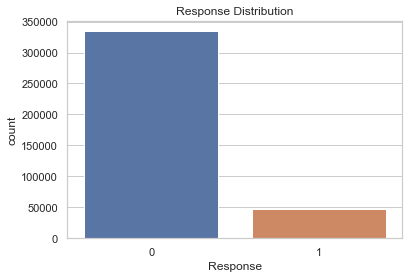

In [24]:
Res_D = sns.countplot(x='Response', data=df_train) 
Res_D.set_title("Response Distribution")

#### Data is Imbalanced. Only about 50000 customers are likely to buy insurance.

## Gender

Text(0.5, 1.0, 'Response Distribution')

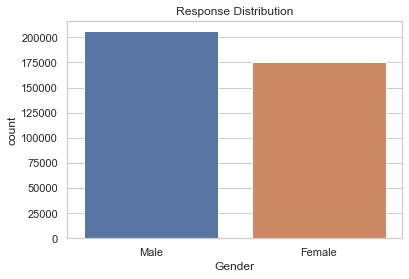

In [25]:
Gender_D = sns.countplot(x='Gender', data=df_train)
Gender_D.set_title("Response Distribution")

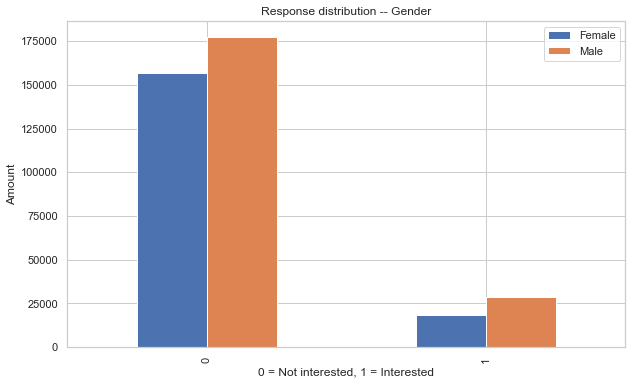

In [26]:
pd.crosstab(df_train['Response'], df_train['Gender']).plot(kind="bar", figsize=(10,6))

plt.title("Response distribution -- Gender")
plt.xlabel("0 = Not interested, 1 = Interested")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
#plt.xticks(rotation=0);

#### Both genders seem to be similar in their response.

## Age

/opt/anaconda3/envs/Python3-7_Keras_env/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


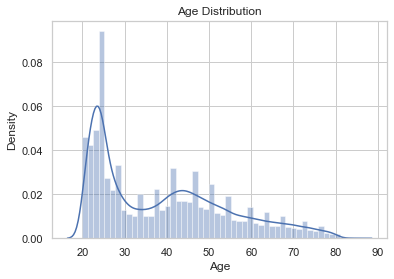

In [27]:
Age_D = sns.distplot(df_train['Age'])
Age_D.set_title("Age Distribution");

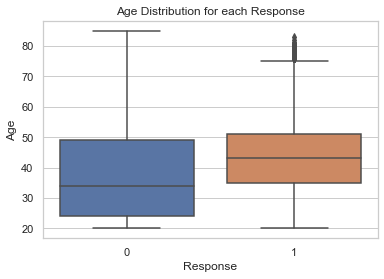

In [28]:
Age_B = sns.boxplot(y='Age', x='Response', data=df_train);
Age_B.set_title("Age Distribution for each Response");

#### Customers of age between 20 to 30 are less likely to buy insurance.


## Driving license

In [29]:
print(df_train['Driving_License'].value_counts())
# most people have a driving license, so I drop 'Driving_License'
df_train = df_train.drop("Driving_License", axis=1)
df_test = df_test.drop("Driving_License", axis=1)

1    380297
0       812
Name: Driving_License, dtype: int64


## Region

In [30]:
df_train['Region_Code'].value_counts()

28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: Region_Code, dtype: int64

/opt/anaconda3/envs/Python3-7_Keras_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Region Wise Response Count'}, xlabel='Region_Code', ylabel='count'>

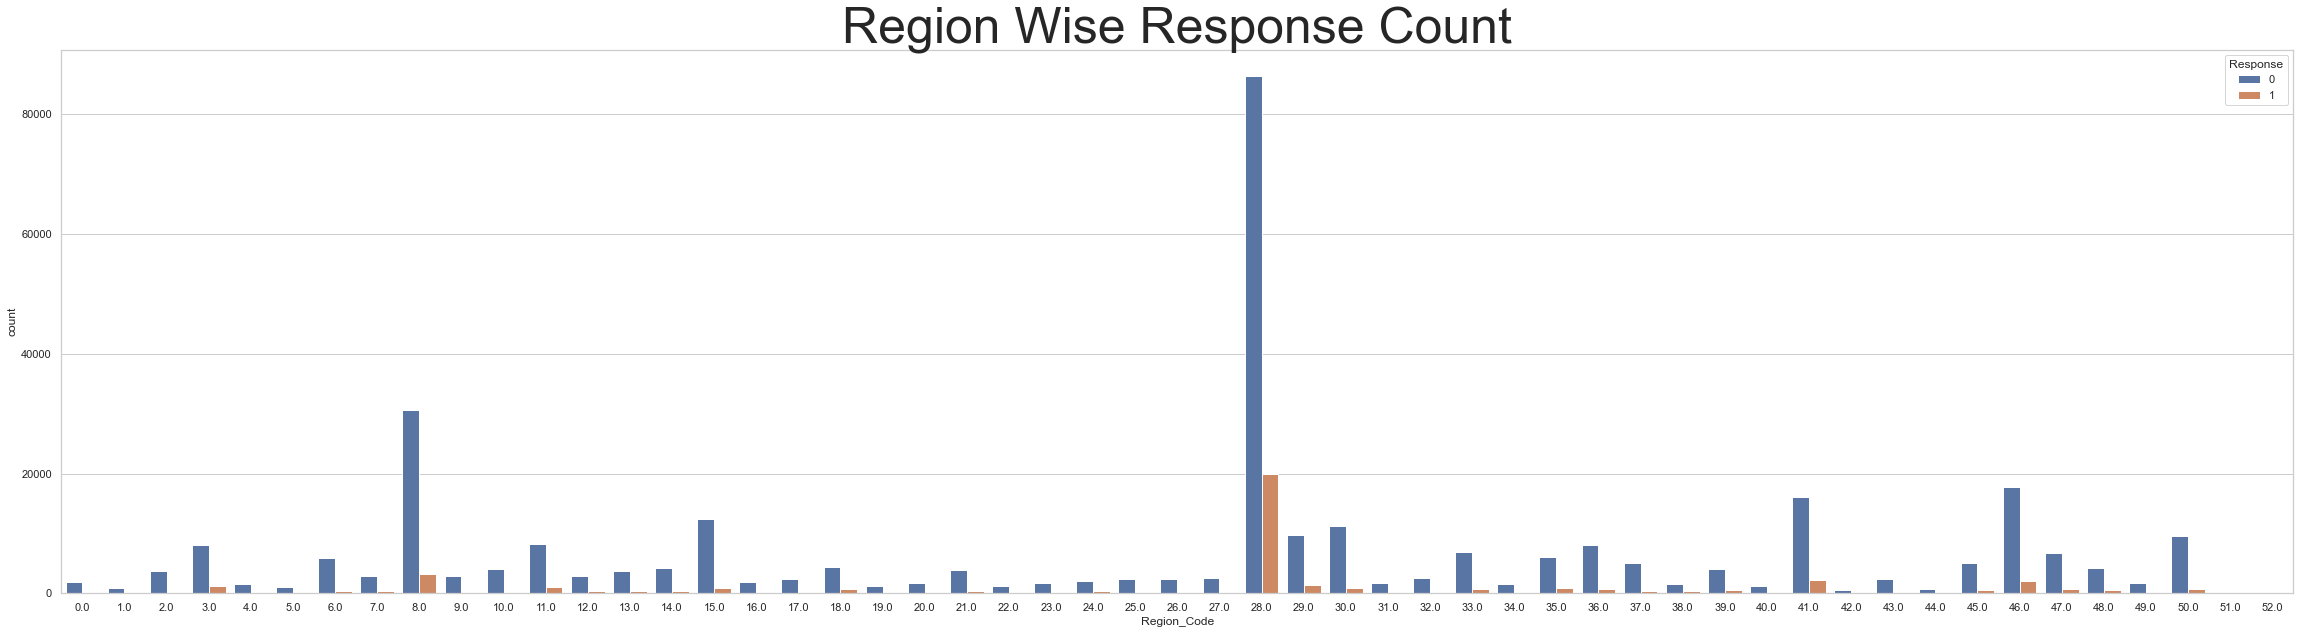

In [31]:
plt.figure(figsize = (40,10))
plt.title('Region Wise Response Count',fontsize=50)
sns.countplot(df_train['Region_Code'], hue = df_train['Response'])

## Previously_Insured

In [32]:
pd.crosstab(df_train['Response'], df_train['Previously_Insured'])

Previously_Insured,0,1
Response,,
0,159929,174470
1,46552,158


#### We can see that customers that already have a vehicle insurance with only very little exception are not interested.

## Vehicle_Age

/opt/anaconda3/envs/Python3-7_Keras_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Vehicle_Damage', ylabel='count'>

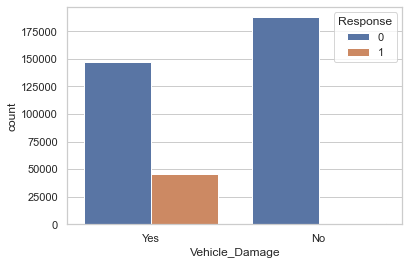

In [33]:
sns.countplot(df_train['Vehicle_Damage'], hue = df_train['Response'])

#### 1.We have almost same number of customes with damaged and non_damaged vehicle.
#### 2.Customers with Vehicle_Damage are more likely to buy insurance.
#### 3.Customers with non damaged vehicle have least chance of buying insurance.

## Annual_Premium

Text(0.5, 1.0, 'Annual_Premium Distribution for each Response')

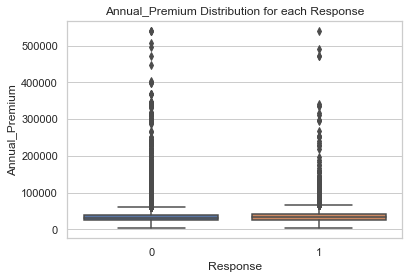

In [45]:
AP_plot = sns.boxplot(y='Annual_Premium', x='Response', data=df_train)
AP_plot.set_title("Annual_Premium Distribution for each Response")

#### Most of the customers have "Annual_Premium' in range (0, 10000) 


## Policy Sales Channel

Text(0.5, 1.0, 'Policy_Sales_Channel Distribution for each Response')

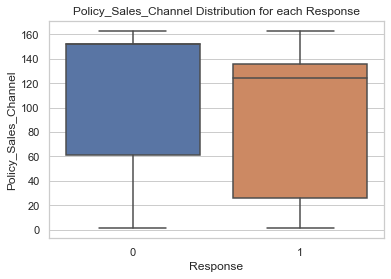

In [35]:
PSC_plot = sns.boxplot(y='Policy_Sales_Channel', x='Response', data=df_train)
PSC_plot.set_title("Policy_Sales_Channel Distribution for each Response")

## Vintage

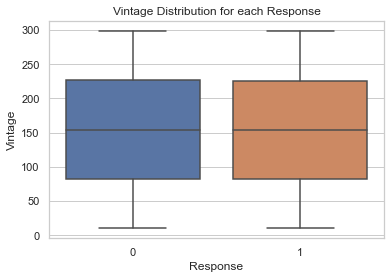

In [36]:
Vintage_plot = sns.boxplot(y='Vintage', x='Response', data=df_train);
Vintage_plot.set_title("Vintage Distribution for each Response");

# Feature Engineering

In [37]:
df_train.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [38]:
df_train['Gender'] = pd.Categorical(df_train['Gender'])
df_train['Previously_Insured'] = pd.Categorical(df_train['Previously_Insured'])
df_train['Vehicle_Age'] = pd.Categorical(df_train['Vehicle_Age'])
df_train['Vehicle_Damage'] = pd.Categorical(df_train['Vehicle_Damage'])
df_train['Response'] = pd.Categorical(df_train['Response'])
df_train['Region_Code'] = pd.Categorical(df_train['Region_Code'])
#原来的字母现在已经被数字所代替，而且用的是从0开始的索引，所以a对应0遇到重复的a同样用0表示，
#这样就可以把非数值的转换成数值的，方便计算
df_train = pd.concat([df_train[['Age', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']],
           pd.get_dummies(df_train[['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']])], axis=1)


In [44]:
df_train.head()

,Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Previously_Insured_0,Previously_Insured_1,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,44,40454.0,26.0,217,1,0,1,1,0,0,0,1,0,1
1,76,33536.0,26.0,183,0,0,1,1,0,1,0,0,1,0
2,47,38294.0,26.0,27,1,0,1,1,0,0,0,1,0,1
3,21,28619.0,152.0,203,0,0,1,0,1,0,1,0,1,0
4,29,27496.0,152.0,39,0,1,0,0,1,0,1,0,1,0


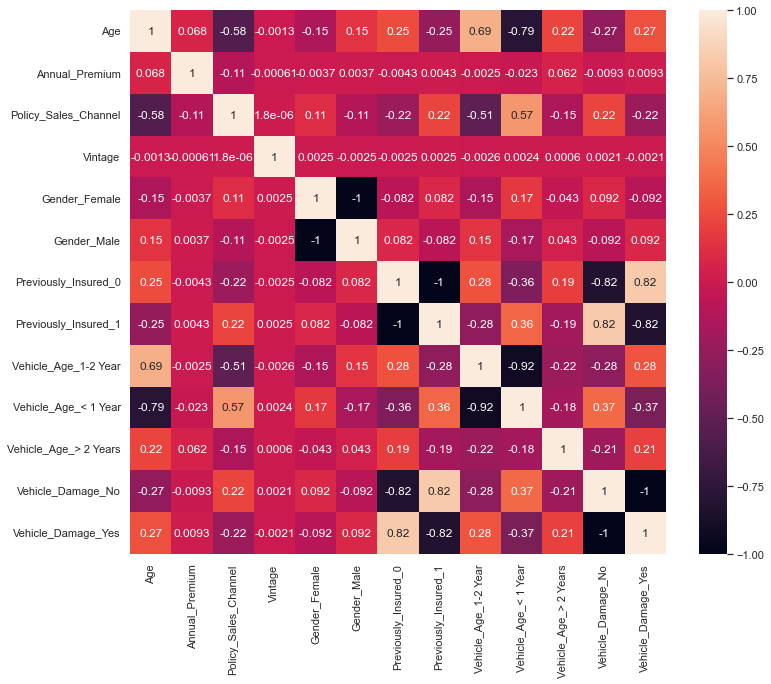

In [40]:
plt.figure(figsize=(12,10))
cor = df_train.corr()
sns.heatmap(cor, annot=True)
plt.show()

#### 1.'Previously_Insured' and 'Vehicle_Damage' are highly positively corelated.
#### 2.'Age' and 'Policy_Sales_Channel' are negatively corelated.
#### 3,'Age' and 'Vehicle_Age' are negatively corelated.

# Modeling

In [41]:
x = df_train.drop(["Response"], axis=1).to_numpy()
y = df_train['Response'].values

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, random_state=0)
lr = LogisticRegression().fit(X_train,Y_train)
Score = lr.score(X_test, Y_test)
print("accuracy:",Score)
print("coef:",lr.coef_)

print("intercept:",lr.intercept_)
print(lr.predict_proba(X_test)) 

accuracy: 0.8736434433972166
coef: [[-4.27250184e-02 -5.20145667e-06 -8.17139603e-03 -1.58124780e-03
  -1.96081777e-01  5.53298107e-02  1.00185028e+00 -1.14260225e+00
   2.64798394e-01 -5.31891830e-01  1.26341470e-01 -1.20102035e+00
   1.06026838e+00]]
intercept: [-0.14075199]
[[0.99777    0.00223   ]
 [0.75973685 0.24026315]
 [0.88075026 0.11924974]
 ...
 [0.58734839 0.41265161]
 [0.99473573 0.00526427]
 [0.73135032 0.26864968]]
